In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# worksheet = gc.open('CIFAR10_NoiseResiliency-Results').sheet1
#### or
# worksheet = result_sheets.worksheets()[0] # take the second sheet

# rows = worksheet.get_all_values()
# pd.DataFrame.from_records(rows)

In [ ]:
flag=True
model_name = 'MoCo'
print(model_name)

w = gc.open('MoCo_results_temp_ablation').sheet1

rows = w.get_all_values()
hdr=rows[0]
hdr = [f'{model_name}_{h}' for h in hdr]
hdr[0] = 'noise'
if flag==True:
  df = pd.DataFrame(rows[1:], columns = hdr)
  flag=False
else:
  new_df = pd.DataFrame(rows[1:], columns = hdr)
  df = pd.merge(df, new_df, how='left')

MoCo


In [ ]:
df

,noise,MoCo_sym_0.05,MoCo_sym_0.1,MoCo_sym_0.5,MoCo_sym_1.0,MoCo_sym_5.0,MoCo_sym_6.0,MoCo_asym_0.05,MoCo_asym_0.1,MoCo_asym_0.5,MoCo_asym_1.0,MoCo_asym_5.0,MoCo_asym_6.0
0,0,80.101,83.568,83.64,81,70.67,81.92,80.101,83.568,83.64,81,70.67,81.92
1,0.1,78.595,82.148,82.79,79.97,68.98,81.24,79.84,83.426,83.47,80.85,70.48,81.84
2,0.2,76.657,80.55,81.41,78.39,67.01,80.37,79.352,82.946,83.22,80.56,70.03,81.62
3,0.3,74.273,78.616,79.70,76.29,65.88,79.13,78.301,81.9,82.47,79.54,68.63,81.15
4,0.4,71.804,75.816,76.96,73.5,63.34,77.05,76.205,80.045,81.02,78.15,66.89,80.06
5,0.5,68.68,73.258,74.56,72,61.77,75.24,73.302,76.772,78.30,75.39,65.14,77.96
6,0.6,66.107,70.239,70.86,68.39,58.54,71.56,69.108,73.123,74.32,71.44,61.8,73.91
7,0.7,62.826,67.28,68.93,65.19,56.51,70.06,65.864,69.495,70.52,67.34,58.37,70.24
8,0.8,59.867,62.648,65.43,61.7,53.62,65.71,59.614,62.865,63.74,61.7,53.74,65.05
9,0.9,54.047,57.624,60.56,57.73,49.88,60.38,53.491,56.376,58.32,55.23,49.83,57.40


In [ ]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))


In [ ]:
def plot_it(noise, acc, name, c, noise_range=(0,10), diff=True, line_style='-'):
    i,j = noise_range
    ref=acc[0] if diff else 0
    plt.plot(noise[i:j], (acc-ref)[i:j], color=c, label=name, linestyle=line_style)
    noise_ths = [0]
    noise_ths.extend([f'{i}0' for i in range(10) if i!=0])
    plt.xticks(noise[i:j], noise_ths)
    plt.xlabel('label noise (%)')
    plt.ylabel('test accuracy degradation')
    plt.legend(loc=3)

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [ ]:
temperatures=['0.05', '0.1', '0.5', '1.0', '5.0', '6.0']
# temperatures=[ '0.1', '0.5', '1']
colors=['r','g', 'b', 'lime', 'm', 'c']


In [ ]:
# '{:20} {}'.format('ss','bb')

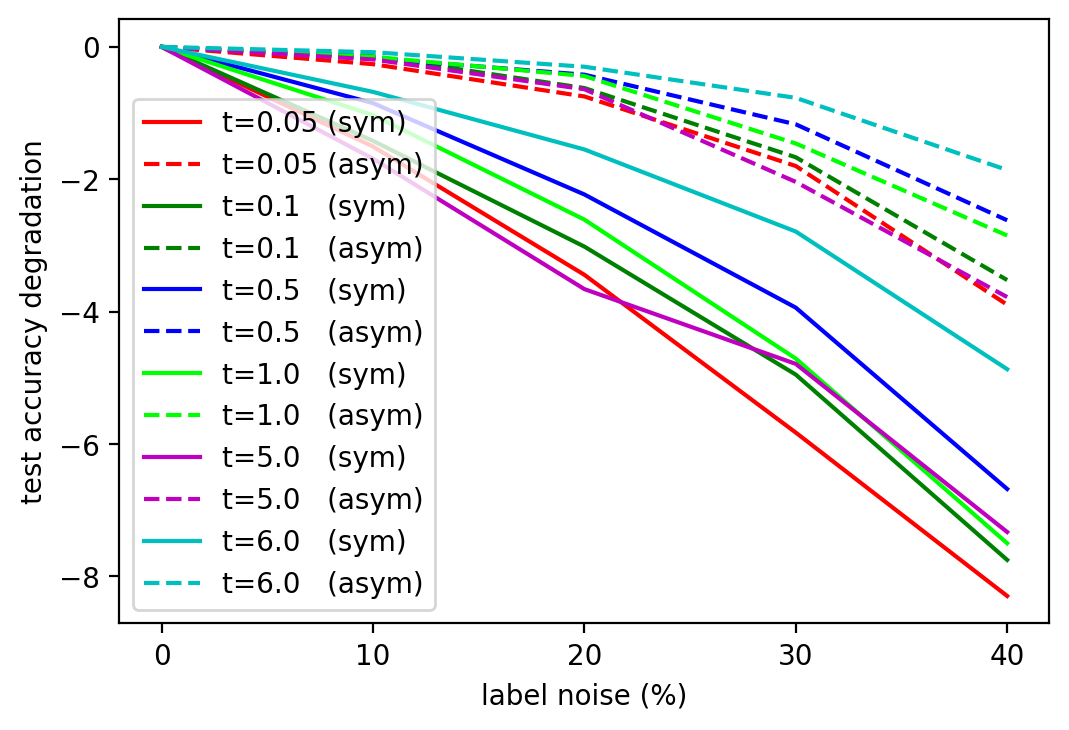

In [ ]:
fig, ax = plt.subplots()

noise = list(df.noise.astype(float))

for t,c in zip(temperatures,colors):
    n_type = 'sym'
    name = f'MoCo_{n_type}_{t}'
    acc = np.array(df[name].apply(pd.to_numeric))
    # lbl = 'temp={:3} ({})'.format(t,n_type) if len(t)>3 else 'temp={:4} ({})'.format(t,n_type) 
    lbl=f't={t}   ({n_type})' if len(t)<4 else f't={t} ({n_type})'
    plot_it(noise, acc, lbl, c=c, noise_range=(0,5), diff=True, line_style='-')

    n_type = 'asym'
    name = f'MoCo_{n_type}_{t}'
    acc = np.array(df[name].apply(pd.to_numeric))
    # lbl = 'temp={:4} ({})'.format(t,n_type) if len(t)>3 else 'temp={:4} ({})'.format(t,n_type) 
    lbl=f't={t}   ({n_type})' if len(t)<4 else f't={t} ({n_type})'
    plot_it(noise, acc, lbl , c=c, noise_range=(0,5), diff=True, line_style='--')

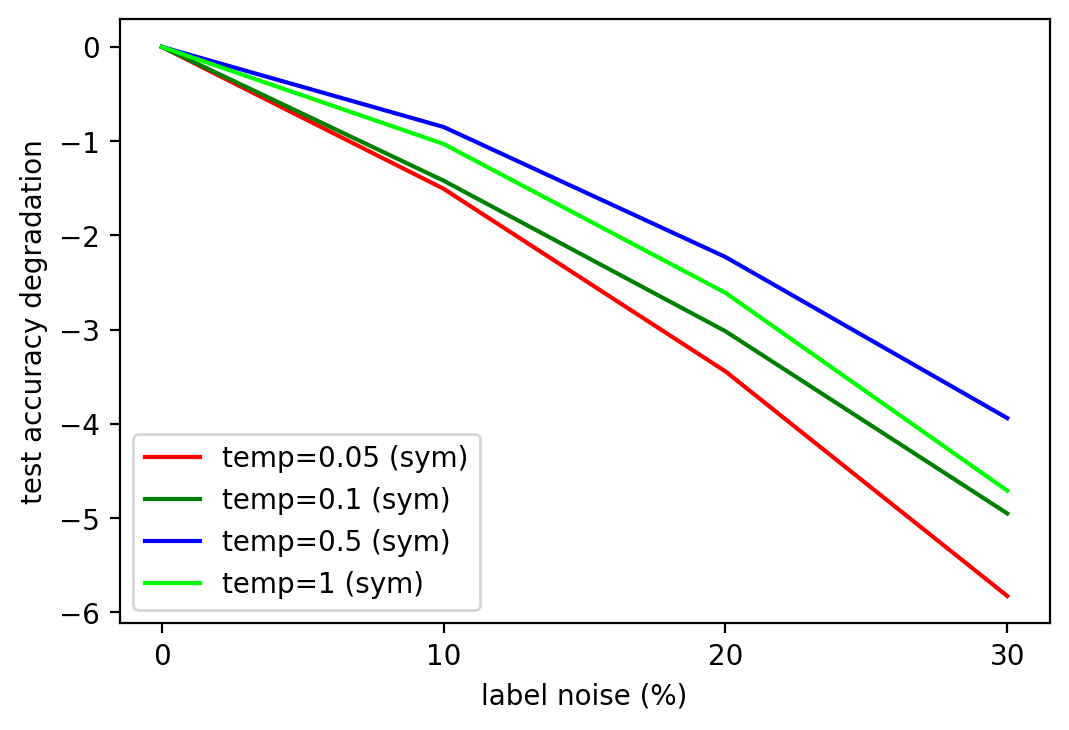

In [ ]:
fig, ax = plt.subplots()

noise = list(df.noise.astype(float))

for t,c in zip(temperatures,colors):
    n_type = 'sym'
    name = f'MoCo_{n_type}_{t}'
    acc = np.array(df[name].apply(pd.to_numeric))
    plot_it(noise, acc, f'temp={t} ({n_type})', c=c, noise_range=(0,4), diff=True, line_style='-')

    # n_type = 'asym'
    # name = f'MoCo_{n_type}_{t}'
    # acc = np.array(df[name].apply(pd.to_numeric))
    # plot_it(noise, acc, f'temp={t} ({n_type})', c=c, noise_range=(0,10), diff=True, line_style='--')

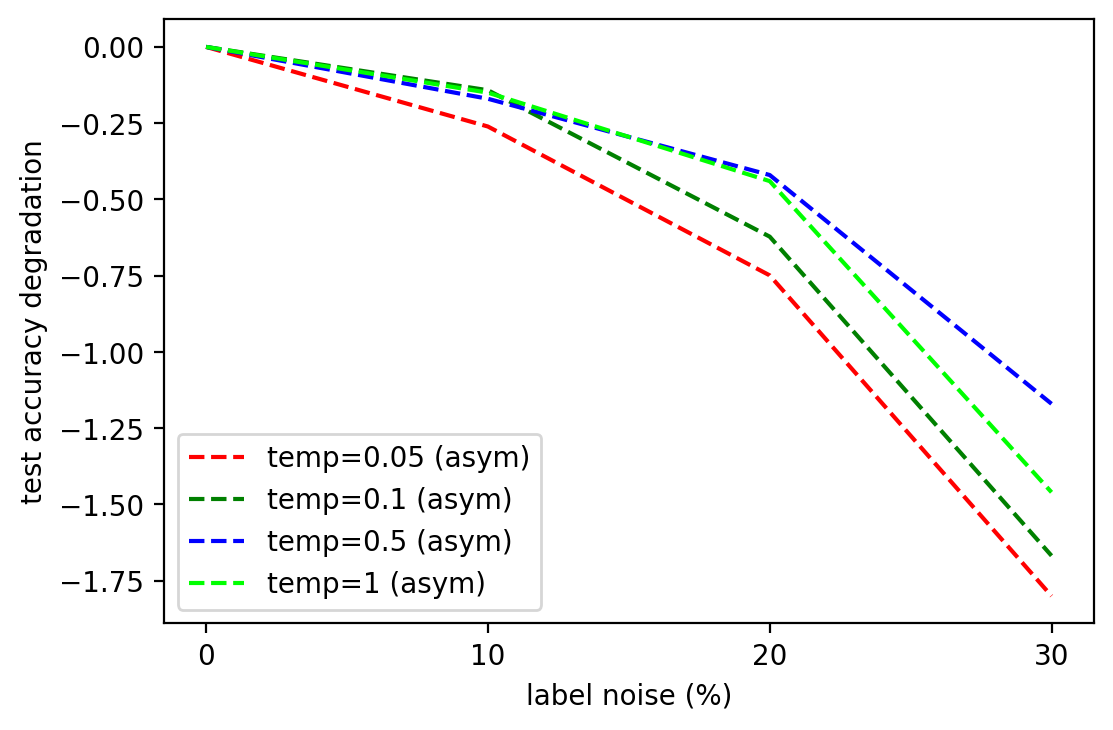

In [ ]:
fig, ax = plt.subplots()

noise = list(df.noise.astype(float))

for t,c in zip(temperatures,colors):
    # n_type = 'sym'
    # name = f'MoCo_{n_type}_{t}'
    # acc = np.array(df[name].apply(pd.to_numeric))
    # plot_it(noise, acc, f'temp={t} ({n_type})', c=c, noise_range=(0,10), diff=True, line_style='-')

    n_type = 'asym'
    name = f'MoCo_{n_type}_{t}'
    acc = np.array(df[name].apply(pd.to_numeric))
    plot_it(noise, acc, f'temp={t} ({n_type})', c=c, noise_range=(0,4), diff=True, line_style='--')